In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [15]:
img1 = cv2.imread('./img2/im01.jpg')
img2 = cv2.imread('./img2/im02.jpg')
img3 = cv2.imread('./img2/im03.jpg')
img4=cv2.imread('./img2/img03.jpg')

In [16]:
images=[img1,img2,img3,img4]

In [4]:
def points(img1,img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1,des1 = sift.detectAndCompute(img1,None)
    kp2,des2=sift.detectAndCompute(img2,None)
    bf = cv2.BFMatcher(crossCheck=True)
    
    matches = bf.match(des1,des2)
    
    matches_sorted = sorted(matches, key = lambda x:x.distance)
    
    new_image = cv2.drawMatches(img1,kp1,img2,kp2,matches_sorted[50:100],None,flags=2)
    plt.imshow(new_image)
    plt.show()
    src=[]
    dest=[]
    for match in matches_sorted[:100]:
        kp_img1=kp1[match.queryIdx]
        kp_img2=kp2[match.trainIdx]
        src.append((kp_img1.pt[0],kp_img1.pt[1]))
        dest.append((kp_img2.pt[0],kp_img2.pt[1]))   

    return([src,dest])

In [5]:
def homography(img1,img2):
    src,dest=points(img2,img1)
    h, status = cv2.findHomography(np.array(src), np.array(dest),cv2.RANSAC, 5.0)
    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]

    list_of_points_1 = np.float32([[0,0], [0,rows1], [cols1, rows1], [cols1,0]]).reshape(-1,1,2)
    temp_points = np.float32([[0,0], [0,rows2], [cols2, rows2], [cols2,0]]).reshape(-1,1,2)

    list_of_points_2 = cv2.perspectiveTransform(temp_points, h)
    list_of_points = np.concatenate((list_of_points_1, list_of_points_2), axis=0)

    [x_min, y_min] = np.int32(list_of_points.min(axis=0).ravel() - 0.5)
    [x_max, y_max] = np.int32(list_of_points.max(axis=0).ravel() + 0.5)

    translation_dist = [-x_min, -y_min]
    H_translation = np.array([[1, 0, translation_dist[0]], [0, 1, translation_dist[1]], [0,0,1]])
    X=x_max-x_min
    Y=y_max-y_min
    h=H_translation.dot(h)
    return(h,X,Y)

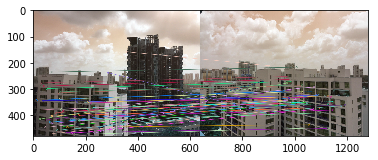

In [6]:
h,X,Y=homography(img1,img2)

In [7]:
im_out = cv2.warpPerspective(images[1],h,(X, Y))
transition_image=im_out.copy()

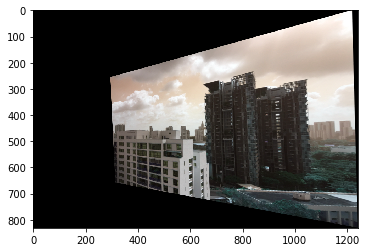

In [8]:
plt.imshow(im_out)

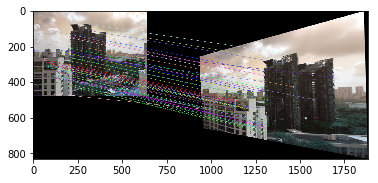

In [9]:
h2,X2,Y2=homography(transition_image,images[2])

In [10]:
result = cv2.warpPerspective(images[2],h2,(X2, Y2))


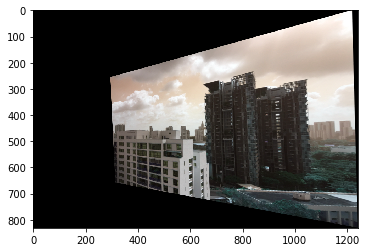

In [11]:
plt.imshow(transition_image)

In [12]:
test=result.copy()

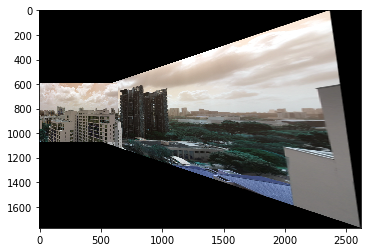

In [13]:

result[transition_image.shape[0]-images[0].shape[0]//2:transition_image.shape[0]+images[0].shape[0]//2,0:img1.shape[1]] = images[0]
plt.imshow(result)



In [14]:
cv2.imwrite('output_panorama.png',result)

True

In [ ]:
for i in range(len(images)-1,0,-2):
    print(i)
    h,X,Y=homography(images[i-2],images[i-1])
    print('a')
    im_out = cv2.warpPerspective(images[i-1],h,(X, Y))
    print('b')
    transition_image=im_out.copy()
    h2,X2,Y2=homography(transition_image,images[i])
    print('c')
    result = cv2.warpPerspective(images[i],h2,(X2, Y2))
    
    result[transition_image.shape[0]-images[i-2].shape[0]//2:transition_image.shape[0]+images[i-2].shape[0]//2,0:images[i-2].shape[1]] = images[i-2]
    plt.imshow(result)


    

In [ ]:


im_out[translation_dist[1]:rows1+translation_dist[1],translation_dist[0]:cols1+translation_dist[0]] = images[0]
X1,X2,Y1,Y2=translation_dist[1],rows1+translation_dist[1],translation_dist[0],cols1+translation_dist[0]
plt.imshow(im_out)

